This notebook corresponds to the development of Script chapter 3.4 from the main text of the dissertation titled: Nobel Microorganisms Associated with Corrosion by this Author.

# Preprocessing I

  >## Splitting the Data into traffic light categories
 
The table consists of 885 rows and 83 columns. The first row contains column headers, which include the first six columns for taxonomic levels: Kingdom, Phylum, Class, Order, Family, and Genus, and one column for the unique genera identifier "GID" . The remaining columns represent 70 different sites or samples.

The second row represents a traffic light system with three categories (1, 2, 3). The header names for this row are located in columns 8 through the last column, and the row itself does not have a name.

The remaining 883 rows represent distinct genera and their respective taxonomic levels, as indicated by the headers in the first row (columns 0 to 6). Each column after the 6 taxonomic levels and the "GID" corresponds to a specific site, and the values in the table indicate the percentage of total microbial abundance for each genus within the respective taxonomic level. For each site, the sum of the percentages equals 100%.

| Kindom   | Phylum         | Class              | Order           | Familia         | Genus               | GID |    1    |   2     |   3     |  4      |   5     |    6    |
| -------- | -------------- | ------------------ | --------------- | --------------- | ------------------- | --- | ------ | ------ | ------ | ------ | ------ | ------ |
|     |                |                    |                 |                 |                     |     | 3      | 1      | 1      | 1      | 1      | 2      |
| Bacteria | Firmicutes     | Clostridia         | Clostridiales   | Clostridiaceae  | 02d06               | 1   | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| Bacteria | Planctomycetes | Planctomycetia     | Pirellulales    | Pirellulaceae   | A17                 | 2   | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| Bacteria | Firmicutes     | Bacilli            | Lactobacillales | Aerococcaceae   | Abiotrophia         | 3   | 0.0000 | 0.0000 | 0.0000 | 0.0154 | 0.0037 | 0.0000 |
| Bacteria | Firmicutes     | Clostridia         | Clostridiales   | Ruminococcaceae | Acetanaerobacterium | 4   | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| Bacteria | Firmicutes     | Clostridia         | Clostridiales   | Ruminococcaceae | Acetivibrio         | 5   | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| Bacteria | Firmicutes     | Clostridia         | Clostridiales   | Eubacteriaceae  | Acetobacterium      | 6   | 0.4308 | 0.0190 | 0.0246 | 0.0176 | 0.0221 | 0.0000 |
| Bacteria | Proteobacteria | Betaproteobacteria | Burkholderiales | Alcaligenaceae  | Achromobacter       | 7   | 0.5170 | 0.3415 | 0.3192 | 0.2512 | 0.5098 | 0.0000 |

In [1]:
# Import the pandas library for data manipulation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson

In [53]:
pd.options.display.float_format = '{:.4f}'.format
# Read the excel file
datos = pd.read_excel('data/Biotot.xlsx', sheet_name='Biotot', header=[0,1], dtype={i: float for i in range(8, 71)})

In [3]:
datos.head()

,Kingdom,Phylum,Class,Order,Familia,Genera,GID,site_1,site_2,site_3,...,site_61,site_62,site_63,site_64,site_65,site_66,site_67,site_68,site_69,site_70
,0,0,0,0,0,0,0,3,1,1,...,2,2,2,2,2,2,3,3,1,1
0,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,02d06,1,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,Bacteria,Planctomycetes,Planctomycetia,Pirellulales,Pirellulaceae,A17,2,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,Bacteria,Firmicutes,Bacilli,Lactobacillales,Aerococcaceae,Abiotrophia,3,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Acetanaerobacterium,4,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Acetivibrio,5,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


I separate the data into categories according to the failure study and the physicochemical study that distinguise three differnet types of data, in this case we are puting them on 1 as the traffic light that is green and that do not poses corrosion problem, type 2 which corresponds to yellow traffic_light_2, may be a potential problem that however still not present  and type 3 red or system with corrosion traffic_light 3. In this way it is easier the visualisation and to the point. 

In [4]:
def split_dataframes(datos):
    '''
    Split the dataframe so that each of the resulting df contain one type of traffic light 
    and the criterio to split the df would be the second header
    '''
    # Extract the second header with traffic light categories to decide the split
    traffic_categories = datos.columns.get_level_values(1)

 # Split the DataFrame based on traffic light categories
    traffic_light_T1 = datos.iloc[:, [i for i, category in enumerate(traffic_categories) if i < 7 or category == 1]]
    traffic_light_T2 = datos.iloc[:, [i for i, category in enumerate(traffic_categories) if i < 7 or category == 2]]
    traffic_light_T3 = datos.iloc[:, [i for i, category in enumerate(traffic_categories) if i < 7 or category == 3]]

    return traffic_light_T1, traffic_light_T2, traffic_light_T3

In [5]:
# Split the DataFrame into three DataFrames based on traffic light categories. Note that traffic_light_T have the taxa leves included.
traffic_light_T1, traffic_light_T2, traffic_light_T3 = split_dataframes(datos)

Define round operation for keeping precision

In [6]:
traffic_light_T1.columns = traffic_light_T1.columns.droplevel(1)
traffic_light_T2.columns = traffic_light_T2.columns.droplevel(1)
traffic_light_T3.columns = traffic_light_T3.columns.droplevel(1)

In [7]:
#Saving splited dataframes  
traffic_light_T1.to_csv("data/traffic_light_T1.csv", index=False)
traffic_light_T2.to_csv("data/traffic_light_T2.csv", index=False)
traffic_light_T3.to_csv("data/traffic_light_T3.csv", index=False)

In [8]:
def round_float_columns(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df.loc[:, col] = df[col].round(4)
    return df# Round the float values

Now in order to perform the filtering according to the criteria visualised in Chapter 3.4 from the Main text, I remove the header that was used to divide the traffic_lights categories and save the taxa categories on a separate dataframe so that at the end of the calculations it would be possible to concatenate the df with the taxa levels.

In [9]:
# Keep the first 6 columns for all rows
taxonomic_columns_1 = traffic_light_T1.iloc[:, :7]
taxonomic_columns_2 = traffic_light_T2.iloc[:, :7]
taxonomic_columns_3 = traffic_light_T3.iloc[:, :7]
taxonomic_columns_1.head()

,Kingdom,Phylum,Class,Order,Familia,Genera,GID
0,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,02d06,1
1,Bacteria,Planctomycetes,Planctomycetia,Pirellulales,Pirellulaceae,A17,2
2,Bacteria,Firmicutes,Bacilli,Lactobacillales,Aerococcaceae,Abiotrophia,3
3,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Acetanaerobacterium,4
4,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Acetivibrio,5


In [10]:
#Saving taxa for later join after the filtering with data_excluded_x 
taxonomic_columns_1.to_csv("data/taxonomic_columns_1.csv", index=False)
taxonomic_columns_2.to_csv("data/taxonomic_columns_2.csv", index=False)
taxonomic_columns_3.to_csv("data/taxonomic_columns_3.csv", index=False)

We extract the percentages without taxa for easiness

In [11]:
abundance_1 = traffic_light_T1.iloc[:, 6:]
abundance_1 = abundance_1.reset_index(drop=True)
# 2
abundance_2 = traffic_light_T2.iloc[:, 6:]
abundance_2 = abundance_2.reset_index(drop=True)
# 3
abundance_3 = traffic_light_T3.iloc[:, 6:]
abundance_3 = abundance_3.reset_index(drop=True)

Save the split DataFrames to separate files.

In [12]:
abundance_1 = round_float_columns(abundance_1)
abundance_2 = round_float_columns(abundance_2)
abundance_3 = round_float_columns(abundance_3)

In [13]:
abundance_2["GID"].nunique()

882

In [14]:
abundance_1.to_csv("data/abundance_1.csv", index=False)
abundance_2.to_csv("data/abundance_2.csv", index=False)
abundance_3.to_csv("data/abundance_3.csv", index=False)

/tmp/ipykernel_18346/529621299.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_for_boxplot_1, ax=ax, shade=True)


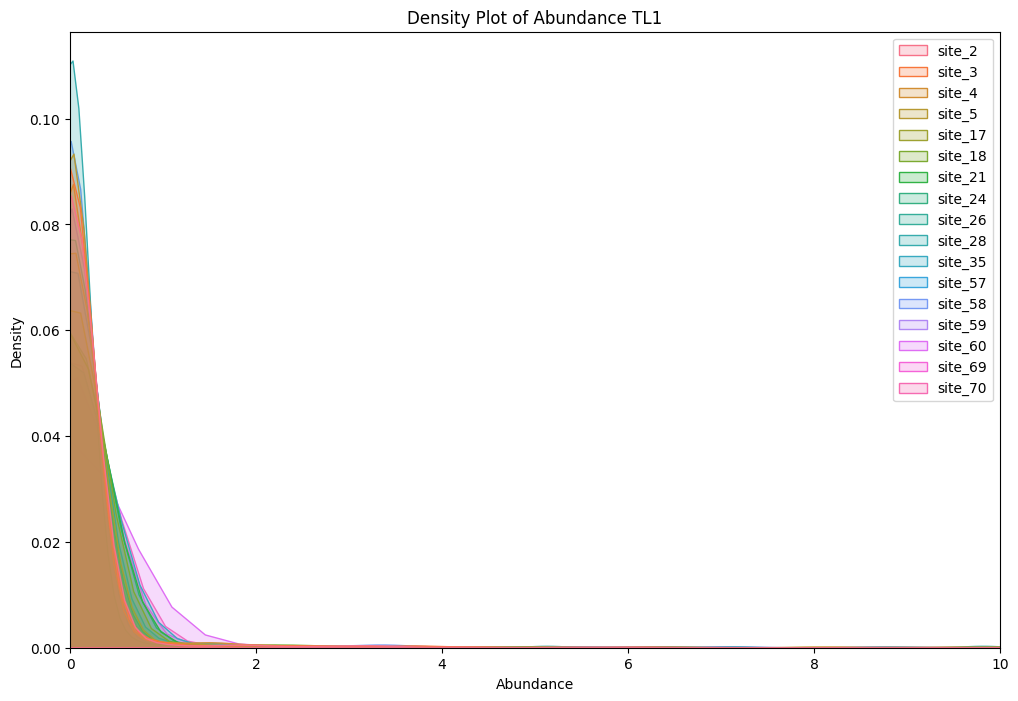

In [15]:
# Following is a visualisation of where the abundance of the samples lays, are the samples distributed normally or are the most densemore abundand
data_for_boxplot_1 = abundance_1.iloc[:, 1:]
fig, ax = plt.subplots(figsize=(12,8))
sns.kdeplot(data=data_for_boxplot_1, ax=ax, shade=True)
ax.set_xlabel('Abundance')
ax.set_xlim((0, 10))
ax.set_ylabel('Density')
ax.set_title('Density Plot of Abundance TL1')
plt.show()

/tmp/ipykernel_18346/3667286642.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_for_boxplot_2, ax=ax, shade=True)


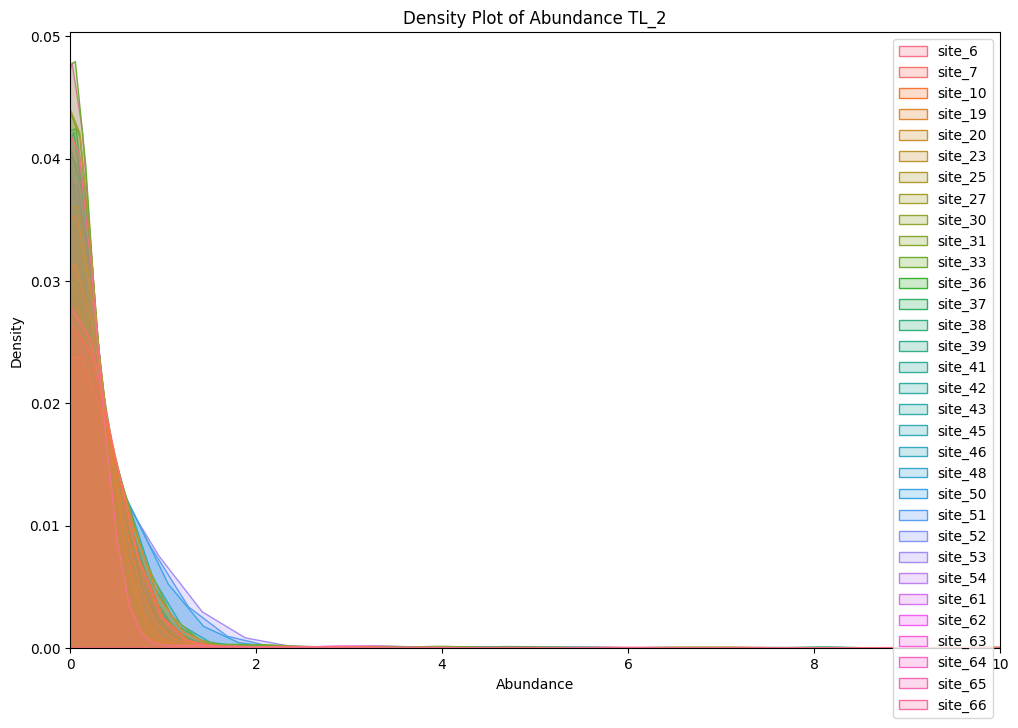

In [16]:
# Following is a visualisation of where the abundance of the samples lays, are the samples distributed normally or are the most densemore abundand
data_for_boxplot_2 = abundance_2.iloc[:, 1:]
fig, ax = plt.subplots(figsize=(12,8))
sns.kdeplot(data=data_for_boxplot_2, ax=ax, shade=True)
ax.set_xlabel('Abundance')
ax.set_xlim((0, 10))
ax.set_ylabel('Density')
ax.set_title('Density Plot of Abundance TL_2')
plt.show()

/tmp/ipykernel_18346/1618904178.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_for_boxplot_3, ax=ax, shade=True)


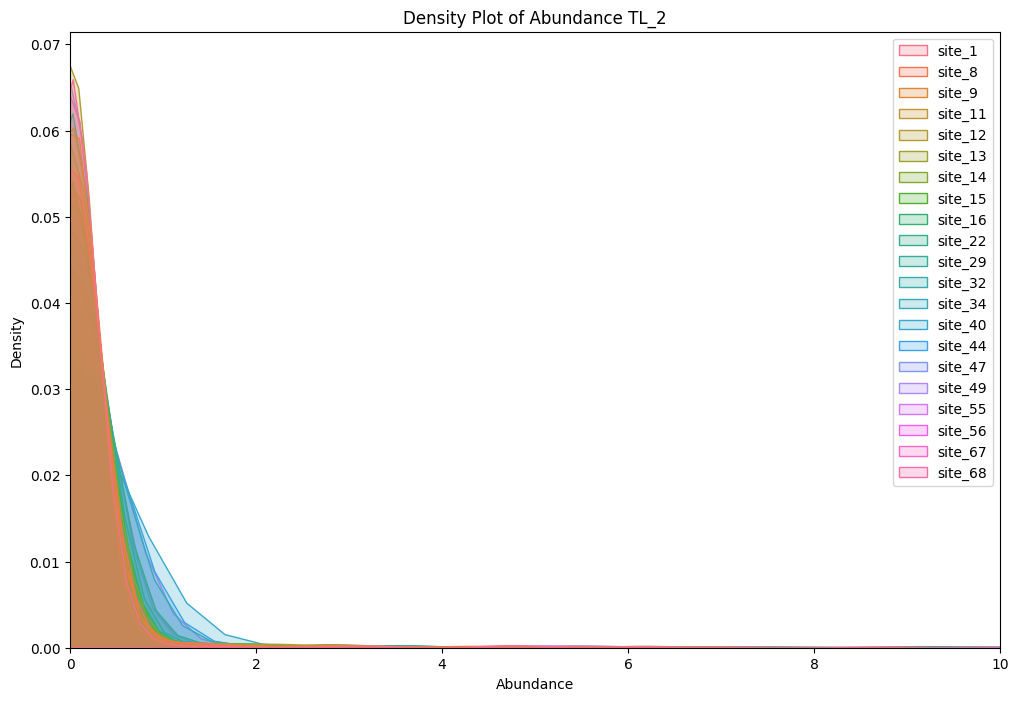

In [17]:
# Following is a visualisation of where the abundance of the samples lays, are the samples distributed normally or are the most densemore abundand
data_for_boxplot_3 = abundance_3.iloc[:, 1:]
fig, ax = plt.subplots(figsize=(12,8))
sns.kdeplot(data=data_for_boxplot_3, ax=ax, shade=True)
ax.set_xlabel('Abundance')
ax.set_xlim((0, 10))
ax.set_ylabel('Density')
ax.set_title('Density Plot of Abundance TL_2')
plt.show()

the half-gaussian shape of the density plot suggests that the majority of the abundance values are concentrated in the samples with lower abundance, and higher abundance  samples are less common. a half bell-shaped distribution is an example of a non-parametric distribution. In this case, the density plot shows a decreasing density as abundance increases, which is common for microbiome abundance data. This type of distribution is often described as a "long-tailed" distribution, as it has a few very high values with many low values. For this reason a proper statistical test is required.

Now we do a test to know what sort of distribution has our data, the test is called Shapiro Anderson using package
from scipy.stats import shapiro, anderson
Anderson-Darling Test: This test, developed by Theodore Anderson and Donald Darling, is a modification of the Kolmogorov-Smirnov (K-S) test and gives more weight to the tails than the K-S test. The Anderson-Darling test makes use of the specific distribution in calculating critical values. This has the advantage of allowing a more sensitive test and the disadvantage that critical values must be calculated for each distribution

In [18]:
# Extract the data from the dataframe
data_Shapiro_1 = abundance_1.iloc[:, 1:].values.flatten()

# Perform Shapiro-Wilk test
stat, p = shapiro(data_Shapiro_1)
print('Shapiro-Wilk test:')
print('   Statistic=%.3f, p-value=%.3f' % (stat, p))
if p > 0.05:
    print('   Probably normal distribution')
else:
    print('   Probably not normal distribution')

# Perform Anderson-Darling test
result = anderson(data_Shapiro_1)
print('\nAnderson-Darling test:')
print('   Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('   %.1f%%: Probably normal distribution' % (sl))
    else:
        print('   %.1f%%: Probably not normal distribution' % (sl))


Shapiro-Wilk test:
   Statistic=0.056, p-value=0.000
   Probably not normal distribution

Anderson-Darling test:
   Statistic: 5310.829
   15.0%: Probably not normal distribution
   10.0%: Probably not normal distribution
   5.0%: Probably not normal distribution
   2.5%: Probably not normal distribution
   1.0%: Probably not normal distribution


/home/beatriz/MIC/2_Micro/.venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [19]:
# Extract the data from the dataframe
data_Shapiro_2 = abundance_2.iloc[:, 1:].values.flatten()

# Perform Shapiro-Wilk test
stat, p = shapiro(data_Shapiro_2)
print('Shapiro-Wilk test:')
print('   Statistic=%.3f, p-value=%.3f' % (stat, p))
if p > 0.05:
    print('   Probably normal distribution')
else:
    print('   Probably not normal distribution')

# Perform Anderson-Darling test
result = anderson(data_Shapiro_2)
print('\nAnderson-Darling test:')
print('   Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('   %.1f%%: Probably normal distribution' % (sl))
    else:
        print('   %.1f%%: Probably not normal distribution' % (sl))

Shapiro-Wilk test:
   Statistic=0.040, p-value=0.000
   Probably not normal distribution

Anderson-Darling test:
   Statistic: 10301.527
   15.0%: Probably not normal distribution
   10.0%: Probably not normal distribution
   5.0%: Probably not normal distribution
   2.5%: Probably not normal distribution
   1.0%: Probably not normal distribution


In [20]:
# Extract the data from the dataframe
data_Shapiro_3 = abundance_3.iloc[:, 1:].values.flatten()

# Perform Shapiro-Wilk test
stat, p = shapiro(data_Shapiro_3)
print('Shapiro-Wilk test:')
print('   Statistic=%.3f, p-value=%.3f' % (stat, p))
if p > 0.05:
    print('   Probably normal distribution')
else:
    print('   Probably not normal distribution')

# Perform Anderson-Darling test
result = anderson(data_Shapiro_3)
print('\nAnderson-Darling test:')
print('   Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('   %.1f%%: Probably normal distribution' % (sl))
    else:
        print('   %.1f%%: Probably not normal distribution' % (sl))

Shapiro-Wilk test:
   Statistic=0.045, p-value=0.000
   Probably not normal distribution

Anderson-Darling test:
   Statistic: 6687.082
   15.0%: Probably not normal distribution
   10.0%: Probably not normal distribution
   5.0%: Probably not normal distribution
   2.5%: Probably not normal distribution
   1.0%: Probably not normal distribution


The samples are named Sites, the genera have an identifier that is unic for each I want to do a dictionary in order to later on know which are the identifieres names. 

In [64]:
# Working only with the taxa
taxa = datos.iloc[:, :7]
taxa.columns = taxa.columns.droplevel(1)

In [65]:

#Capitalising and removing spaces to the already curated list of bacteria and archea taxonomic levels
taxa = taxa.applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)

In [66]:
taxa['joined_tax'] = taxa['Order'] + "_" + taxa['Familia'] + "_" + taxa['Genera']

Now we save the dataframe to use in the next dataframes Notebooks

In [68]:
# Save the dataframes
with pd.ExcelWriter('data/taxa.xlsx', engine='openpyxl') as writer:
    taxa.to_excel(writer, sheet_name='taxa_names', index=False)

This code gives a dictionary where the keys are the categories and the values are lists of genera that are exclusive to each category. However, if you also need the abundance values for these exclusive genera, we'll need to modify the approach slightly.

Instead of just getting the names of the exclusive genera, we can filter the original dataframe to get the rows corresponding to these genera, which will also include their abundance values

### Unique Columns Dataframe Extraction
I did no manage the programatically join the two df, so I did it on excel. The operation consisted of taking the taxa.xlsx information from the df just done in the previous snipets and join them to the original df Biotot.xlsx.

In [253]:
pd.options.display.float_format = '{:.4f}'.format
# Read the excel file
Jointax = pd.read_excel('data/Jointax.xlsx', sheet_name='Biotot_jointax', header=[0,1,2,3,4,5,6,7])#, sort=False)#, dtype={i: float for i in range(2, 882)})
Jointax["Sites"]= Jointax["Sites"].astype(str)
Jointax["Category"]= Jointax["Category"].astype(int)

Jointax= Jointax.set_index("Sites")
#Correcting the Tuple-like Index
Jointax.index = Jointax.index.map(lambda x: x[0] if isinstance(x, tuple) else x)

In [254]:
Jointax.shape

(70, 883)

In [255]:
def exclusive_genera_with_abundance(df):
    """
    Extract genera that are exclusive to each category along with their abundances.
    """
    # Define the categories
    categories = [1, 2, 3]

    # Extracting the full tuple for each column (excluding 'Category')
    jointax_columns = [col for col in df.columns if col[0] not in ["Category"]]

    # Extract the values of the "Category" column
    category_values = df["Category"].values

    exclusive_data = []

    for cat in categories:
        # Filter dataframe for the current category
        cat_df = df[category_values == cat]

        # Check for genera that are present only in the current category and not in others
        for col in jointax_columns:
            if (cat_df[col].sum() > 0) and (df[category_values != cat][col].sum() == 0):
                 exclusive_data.append(cat_df[[col]])  # Append as DataFrame

    # Concatenate the exclusive data
    exclusive_df = pd.concat(exclusive_data, axis=1)
    
    # Filter out columns that don't have at least 3 non-zero values
    exclusive_df = exclusive_df.loc[:, (exclusive_df > 0).sum(axis=0) >= 3]
    
    return exclusive_df

In [256]:
exclusive_df = exclusive_genera_with_abundance(Jointax)
exclusive_df.fillna(0, inplace=True)
exclusive_df.reset_index("Sites")
exclusive_df.head()

,Clostridiales_Peptostreptococcaceae_Peptoclostridium,Pirellulales_Pirellulaceae_A17,Clostridiales_Lachnospiraceae_Anaerostipes,Desulfovibrionales_Desulfovibrionaceae_Bilophila,Clostridiales_Lachnospiraceae_Butyrivibrio,Burkholderiales_Comamonadaceae_Candidatus_symbiobacter,Actinomycetales_Propionibacteriaceae_Cutibacterium,Clostridiales_Lachnospiraceae_Dorea,Geodermatophilales_Geodermatophilaceae_Geodermatophilus,Chitinophagales_Chitinophagaceae_Hydrotalea,Clostridiales_Lachnospiraceae_Lachnospira,Bacteroidales_Porphyromonadaceae_Parabacteroides,Burkholderiales_Comamonadaceae_Roseateles,Nitrosomonadales_Gallionellaceae_Sulfuricella,Enterobacteriales_Erwiniaceae_Tatumella,Actinomycetales_Promicromonosporaceae_Cellulosimicrobium,Actinomycetales_Microbacteriaceae_Clavibacter,Actinomycetales_Microbacteriaceae_Leucobacter,Actinomycetales_Micrococcaceae_Pseudarthrobacter
,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria
,Firmicutes,Planctomycetes,Firmicutes,Proteobacteria,Firmicutes,Proteobacteria,Actinobacteria,Firmicutes,Actinobacteria,Bacteroidetes,Firmicutes,Bacteroidetes,Proteobacteria,Proteobacteria,Proteobacteria,Actinobacteria,Actinobacteria,Actinobacteria,Actinobacteria
,Clostridia,Planctomycetia,Clostridia,Deltaproteobacteria,Clostridia,Betaproteobacteria,Actinobacteria,Clostridia,Actinobacteria,Chitinophagia,Clostridia,Bacteroidia,Betaproteobacteria,Betaproteobacteria,Gammaproteobacteria,Actinobacteria,Actinobacteria,Actinobacteria,Actinobacteria
,Clostridiales,Pirellulales,Clostridiales,Desulfovibrionales,Clostridiales,Burkholderiales,Actinomycetales,Clostridiales,Geodermatophilales,Chitinophagales,Clostridiales,Bacteroidales,Burkholderiales,Nitrosomonadales,Enterobacteriales,Actinomycetales,Actinomycetales,Actinomycetales,Actinomycetales
,Peptostreptococcaceae,Pirellulaceae,Lachnospiraceae,Desulfovibrionaceae,Lachnospiraceae,Comamonadaceae,Propionibacteriaceae,Lachnospiraceae,Geodermatophilaceae,Chitinophagaceae,Lachnospiraceae,Porphyromonadaceae,Comamonadaceae,Gallionellaceae,Erwiniaceae,Promicromonosporaceae,Microbacteriaceae,Microbacteriaceae,Micrococcaceae
,Peptoclostridium,A17,Anaerostipes,Bilophila,Butyrivibrio,Candidatus_symbiobacter,Cutibacterium,Dorea,Geodermatophilus,Hydrotalea,Lachnospira,Parabacteroides,Roseateles,Sulfuricella,Tatumella,Cellulosimicrobium,Clavibacter,Leucobacter,Pseudarthrobacter
,541,2,85,133,159,190,238,287,340,372,399,524,621,690,710,201,211,418,583
Sites,,,,,,,,,,,,,,,,,,,
site_2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
site_3,0.0123,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [257]:
Jointax.reset_index("Sites")

,Sites,Category,Clostridiales_Clostridiaceae_02d06,Pirellulales_Pirellulaceae_A17,Lactobacillales_Aerococcaceae_Abiotrophia,Clostridiales_Ruminococcaceae_Acetanaerobacterium,Clostridiales_Ruminococcaceae_Acetivibrio,Clostridiales_Eubacteriaceae_Acetobacterium,Burkholderiales_Alcaligenaceae_Achromobacter,Clostridiales_Acidaminobacteraceae_Acidaminobacter,...,Xanthomonadales_Xanthomonadaceae_Xanthomonas,Burkholderiales_Comamonadaceae_Xenophilus,Xanthomonadales_Xanthomonadaceae_Xylella,Burkholderiales_Unclassified_burkholderiales_Xylophilus,Enterobacteriales_Yersiniaceae_Yersinia,Micrococcales_Microbacteriaceae_Yonghaparkia,Rhodocyclales_Rhodocyclaceae_Z-35,Micrococcales_Microbacteriaceae_Zimmermannella,Rhodocyclales_Rhodocyclaceae_Zoogloea,Sphingomonadales_Sphingomonadaceae_Zymomonas
,,Kingdom,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,...,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria
,,Phylum,Firmicutes,Planctomycetes,Firmicutes,Firmicutes,Firmicutes,Firmicutes,Proteobacteria,Firmicutes,...,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,Actinobacteria,Proteobacteria,Actinobacteria,Proteobacteria,Proteobacteria
,,Class,Clostridia,Planctomycetia,Bacilli,Clostridia,Clostridia,Clostridia,Betaproteobacteria,Clostridia,...,Gammaproteobacteria,Betaproteobacteria,Gammaproteobacteria,Betaproteobacteria,Gammaproteobacteria,Actinobacteria,Betaproteobacteria,Actinobacteria,Betaproteobacteria,Alphaproteobacteria
,,Order,Clostridiales,Pirellulales,Lactobacillales,Clostridiales,Clostridiales,Clostridiales,Burkholderiales,Clostridiales,...,Xanthomonadales,Burkholderiales,Xanthomonadales,Burkholderiales,Enterobacteriales,Micrococcales,Rhodocyclales,Micrococcales,Rhodocyclales,Sphingomonadales
,,Familia,Clostridiaceae,Pirellulaceae,Aerococcaceae,Ruminococcaceae,Ruminococcaceae,Eubacteriaceae,Alcaligenaceae,Acidaminobacteraceae,...,Xanthomonadaceae,Comamonadaceae,Xanthomonadaceae,Unclassified_burkholderiales,Yersiniaceae,Microbacteriaceae,Rhodocyclaceae,Microbacteriaceae,Rhodocyclaceae,Sphingomonadaceae
,,Genera,02d06,A17,Abiotrophia,Acetanaerobacterium,Acetivibrio,Acetobacterium,Achromobacter,Acidaminobacter,...,Xanthomonas,Xenophilus,Xylella,Xylophilus,Yersinia,Yonghaparkia,Z-35,Zimmermannella,Zoogloea,Zymomonas
,,GID,1,2,3,4,5,6,7,8,...,873,874,875,876,877,878,879,880,881,882
0,site_1,3,0.0000,0.0000,0.0000,0.0000,0.0000,0.4308,0.5170,0.0000,...,0.0000,0.0000,0.0000,0.0215,0.0000,0.0000,0.0000,0.0000,0.0215,0.0387
1,site_2,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0190,0.3415,0.0000,...,0.0190,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0190,0.0000
2,site_3,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0246,0.3192,0.0000,...,0.0123,0.0000,0.0000,0.0123,0.0000,0.0000,0.0000,0.0000,0.0246,0.0000


In [258]:
#exclusive_df["Category"] = Jointax["Category"].values

In [259]:
exclusive_df.head()

,Clostridiales_Peptostreptococcaceae_Peptoclostridium,Pirellulales_Pirellulaceae_A17,Clostridiales_Lachnospiraceae_Anaerostipes,Desulfovibrionales_Desulfovibrionaceae_Bilophila,Clostridiales_Lachnospiraceae_Butyrivibrio,Burkholderiales_Comamonadaceae_Candidatus_symbiobacter,Actinomycetales_Propionibacteriaceae_Cutibacterium,Clostridiales_Lachnospiraceae_Dorea,Geodermatophilales_Geodermatophilaceae_Geodermatophilus,Chitinophagales_Chitinophagaceae_Hydrotalea,Clostridiales_Lachnospiraceae_Lachnospira,Bacteroidales_Porphyromonadaceae_Parabacteroides,Burkholderiales_Comamonadaceae_Roseateles,Nitrosomonadales_Gallionellaceae_Sulfuricella,Enterobacteriales_Erwiniaceae_Tatumella,Actinomycetales_Promicromonosporaceae_Cellulosimicrobium,Actinomycetales_Microbacteriaceae_Clavibacter,Actinomycetales_Microbacteriaceae_Leucobacter,Actinomycetales_Micrococcaceae_Pseudarthrobacter
,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria
,Firmicutes,Planctomycetes,Firmicutes,Proteobacteria,Firmicutes,Proteobacteria,Actinobacteria,Firmicutes,Actinobacteria,Bacteroidetes,Firmicutes,Bacteroidetes,Proteobacteria,Proteobacteria,Proteobacteria,Actinobacteria,Actinobacteria,Actinobacteria,Actinobacteria
,Clostridia,Planctomycetia,Clostridia,Deltaproteobacteria,Clostridia,Betaproteobacteria,Actinobacteria,Clostridia,Actinobacteria,Chitinophagia,Clostridia,Bacteroidia,Betaproteobacteria,Betaproteobacteria,Gammaproteobacteria,Actinobacteria,Actinobacteria,Actinobacteria,Actinobacteria
,Clostridiales,Pirellulales,Clostridiales,Desulfovibrionales,Clostridiales,Burkholderiales,Actinomycetales,Clostridiales,Geodermatophilales,Chitinophagales,Clostridiales,Bacteroidales,Burkholderiales,Nitrosomonadales,Enterobacteriales,Actinomycetales,Actinomycetales,Actinomycetales,Actinomycetales
,Peptostreptococcaceae,Pirellulaceae,Lachnospiraceae,Desulfovibrionaceae,Lachnospiraceae,Comamonadaceae,Propionibacteriaceae,Lachnospiraceae,Geodermatophilaceae,Chitinophagaceae,Lachnospiraceae,Porphyromonadaceae,Comamonadaceae,Gallionellaceae,Erwiniaceae,Promicromonosporaceae,Microbacteriaceae,Microbacteriaceae,Micrococcaceae
,Peptoclostridium,A17,Anaerostipes,Bilophila,Butyrivibrio,Candidatus_symbiobacter,Cutibacterium,Dorea,Geodermatophilus,Hydrotalea,Lachnospira,Parabacteroides,Roseateles,Sulfuricella,Tatumella,Cellulosimicrobium,Clavibacter,Leucobacter,Pseudarthrobacter
,541,2,85,133,159,190,238,287,340,372,399,524,621,690,710,201,211,418,583
Sites,,,,,,,,,,,,,,,,,,,
site_2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
site_3,0.0123,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [268]:
Uniques = pd.concat([Jointax[["Category"]], exclusive_df], axis= 1, join = "outer")
Uniques.reset_index("Sites")
Uniques

,Category,Clostridiales_Peptostreptococcaceae_Peptoclostridium,Pirellulales_Pirellulaceae_A17,Clostridiales_Lachnospiraceae_Anaerostipes,Desulfovibrionales_Desulfovibrionaceae_Bilophila,Clostridiales_Lachnospiraceae_Butyrivibrio,Burkholderiales_Comamonadaceae_Candidatus_symbiobacter,Actinomycetales_Propionibacteriaceae_Cutibacterium,Clostridiales_Lachnospiraceae_Dorea,Geodermatophilales_Geodermatophilaceae_Geodermatophilus,Chitinophagales_Chitinophagaceae_Hydrotalea,Clostridiales_Lachnospiraceae_Lachnospira,Bacteroidales_Porphyromonadaceae_Parabacteroides,Burkholderiales_Comamonadaceae_Roseateles,Nitrosomonadales_Gallionellaceae_Sulfuricella,Enterobacteriales_Erwiniaceae_Tatumella,Actinomycetales_Promicromonosporaceae_Cellulosimicrobium,Actinomycetales_Microbacteriaceae_Clavibacter,Actinomycetales_Microbacteriaceae_Leucobacter,Actinomycetales_Micrococcaceae_Pseudarthrobacter
,Kingdom,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria
,Phylum,Firmicutes,Planctomycetes,Firmicutes,Proteobacteria,Firmicutes,Proteobacteria,Actinobacteria,Firmicutes,Actinobacteria,Bacteroidetes,Firmicutes,Bacteroidetes,Proteobacteria,Proteobacteria,Proteobacteria,Actinobacteria,Actinobacteria,Actinobacteria,Actinobacteria
,Class,Clostridia,Planctomycetia,Clostridia,Deltaproteobacteria,Clostridia,Betaproteobacteria,Actinobacteria,Clostridia,Actinobacteria,Chitinophagia,Clostridia,Bacteroidia,Betaproteobacteria,Betaproteobacteria,Gammaproteobacteria,Actinobacteria,Actinobacteria,Actinobacteria,Actinobacteria
,Order,Clostridiales,Pirellulales,Clostridiales,Desulfovibrionales,Clostridiales,Burkholderiales,Actinomycetales,Clostridiales,Geodermatophilales,Chitinophagales,Clostridiales,Bacteroidales,Burkholderiales,Nitrosomonadales,Enterobacteriales,Actinomycetales,Actinomycetales,Actinomycetales,Actinomycetales
,Familia,Peptostreptococcaceae,Pirellulaceae,Lachnospiraceae,Desulfovibrionaceae,Lachnospiraceae,Comamonadaceae,Propionibacteriaceae,Lachnospiraceae,Geodermatophilaceae,Chitinophagaceae,Lachnospiraceae,Porphyromonadaceae,Comamonadaceae,Gallionellaceae,Erwiniaceae,Promicromonosporaceae,Microbacteriaceae,Microbacteriaceae,Micrococcaceae
,Genera,Peptoclostridium,A17,Anaerostipes,Bilophila,Butyrivibrio,Candidatus_symbiobacter,Cutibacterium,Dorea,Geodermatophilus,Hydrotalea,Lachnospira,Parabacteroides,Roseateles,Sulfuricella,Tatumella,Cellulosimicrobium,Clavibacter,Leucobacter,Pseudarthrobacter
,GID,541,2,85,133,159,190,238,287,340,372,399,524,621,690,710,201,211,418,583
Sites,,,,,,,,,,,,,,,,,,,,
site_1,3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
site_2,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [272]:
# Save the dataframes
with pd.ExcelWriter('data/Jointax.xlsx', mode='a', engine='openpyxl') as writer:
    Uniques.to_excel(writer, sheet_name='uniques_no exclusive', header=[0,1,2,3,4,5,6])